Text(0, 0.5, 'ReE')

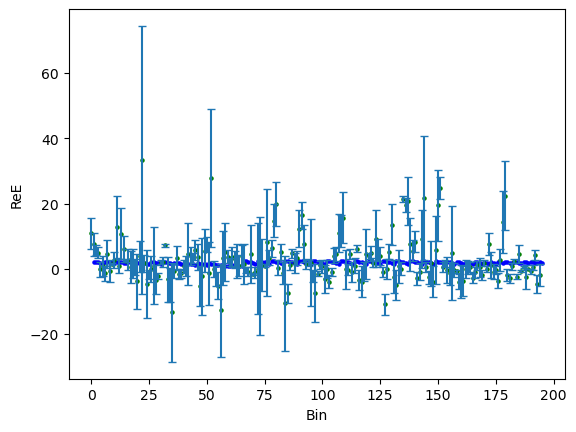

In [120]:
#Plot Comparing fitted values with standard deviation error bars and true values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Name of column that you want plotted
column_y = 'ReE'

# Read True values
df = pd.read_csv("pseudo_KM15.csv")

# Read Standard Deviations
stdev_df = pd.read_csv("stdev.csv")

# Get the unique values in the first column
unique_values = df[df.columns[0]].unique()

# Create a list to store the rows with the same values in the first column
result = []
for value in unique_values:
    chunk = df[df[df.columns[0]] == value]
    result.append(chunk.iloc[0,:])

# Convert the result to a pandas DataFrame
result = pd.DataFrame(result, columns=df.columns)

# Read Mean fit numbers, and assign name to columns
df = pd.read_csv("Mean(195).csv", names = ['Bin','ReH', 'ReE', 'ReHTilde', 'dvcs'])
df = df.drop(index=df.index[0])

# Read Standard Deviation fit numbers, and assign name to columns
stdev_df = pd.read_csv("STD(195).csv", names = ['Bin','ReH', 'ReE', 'ReHTilde', 'dvcs'])
stdev_df = stdev_df.drop(index=stdev_df.index[0])
y_err = stdev_df[column_y].to_numpy()



# Plot x against y
plt.scatter(result['#Set'], result[column_y], color = 'b', s = 5)
plt.scatter(np.array(df['Bin']), np.array(df[column_y]), color = 'g', s = 5)
plt.errorbar(np.array(df['Bin']),np.array(df[column_y]), yerr=y_err, fmt='none', capsize=3)

plt.xlabel('Bin')
plt.ylabel(f'{column_y}')


Text(0, 0.5, 'F')

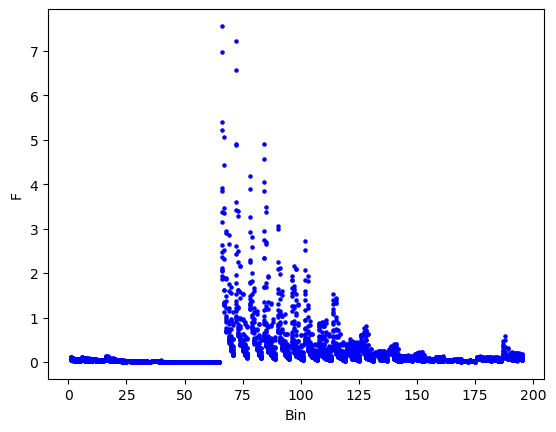

In [118]:
# Multiple F values plotted per Bin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read True values
df = pd.read_csv("pseudo_KM15.csv")

# Read Standard Deviations
stdev_df = pd.read_csv("stdev.csv")

# Get the unique values in the first column
unique_values = df[df.columns[0]].unique()

# Create a list to store the rows with the same values in the first column
result = []
for value in unique_values:
    chunk = df[df[df.columns[0]] == value]
    # Add all the values in column 'F' that correspond to this chunk
    y_values = chunk['F'].to_list()
    result.extend([(value, y_value) for y_value in y_values])

# Convert the result to a pandas DataFrame
result = pd.DataFrame(result, columns=['#Set', 'F'])



# Read Mean fit numbers, and assign name to columns
df = pd.read_csv("Mean(195).csv", names = ['Bin','ReH', 'ReE', 'ReHTilde', 'dvcs'])
df = df.drop(index=df.index[0])

# Read Standard Deviation fit numbers, and assign name to columns
#stdev_df = pd.read_csv("STD(195).csv", names = ['Bin','ReH', 'ReE', 'ReHTilde', 'dvcs'])
#stdev_df = stdev_df.drop(index=stdev_df.index[0])
#y_err = stdev_df[column_y].to_numpy()



# Define the range of x values to plot
x_min = 0
x_max = 195

# Filter the data to only include the rows where x falls within the desired range
result_filtered = result[result['#Set'].between(x_min, x_max)]


# Plot x against y
plt.scatter(result_filtered['#Set'], result_filtered['F'], color='b', s=5)
#plt.scatter(result['#Set'], result['F'], color = 'b', s = 5)
#plt.scatter(np.array(df['Bin']), np.array(df[column_y]), color = 'g', s = 5)
#plt.errorbar(np.array(df['Bin']),np.array(df[column_y]), yerr=y_err, fmt='none', capsize=3)

plt.xlabel('Bin')
plt.ylabel('F')


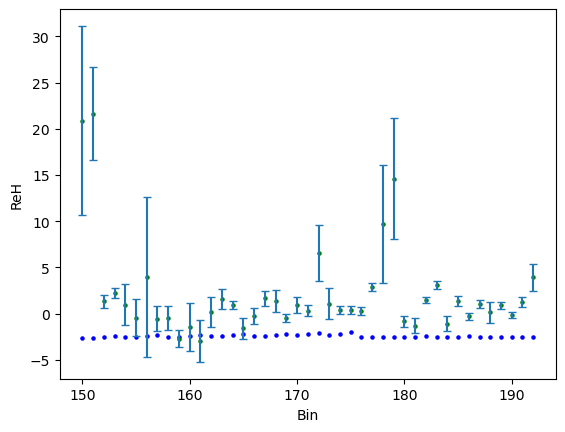

In [124]:
#Filtered Plot of standard deviation of fits compared with true values and mean values

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Name of column that you want plotted
column_y = 'ReH'

# Read True values
df = pd.read_csv("pseudo_KM15.csv")

# Get the unique values in the first column
unique_values = df[df.columns[0]].unique()

# Create a list to store the rows with the same values in the first column
result = []
for value in unique_values:
    chunk = df[df[df.columns[0]] == value]
    result.append(chunk.iloc[0,:])

# Convert the result to a pandas DataFrame
result = pd.DataFrame(result, columns=df.columns)

# Read Mean fit numbers, and assign name to columns
df = pd.read_csv("Mean.csv", names = ['Bin','ReH', 'ReE', 'ReHTilde', 'dvcs'])
df = df.drop(index=df.index[0])

# Read Standard Deviation fit numbers, and assign name to columns
stdev_df = pd.read_csv("STD.csv", names = ['Bin','ReH', 'ReE', 'ReHTilde', 'dvcs'])
stdev_df = stdev_df.drop(index=stdev_df.index[0])

# Filter the data based on x range
x_range = (150, 192)
result_filtered = result[(result['#Set'] >= x_range[0]) & (result['#Set'] <= x_range[1])]
df_filtered = df[(df['Bin'] >= x_range[0]) & (df['Bin'] <= x_range[1])]
y_err_filtered = stdev_df[(stdev_df['Bin'] >= x_range[0]) & (stdev_df['Bin'] <= x_range[1])][column_y].to_numpy()

# Plot x against y
plt.scatter(result_filtered['#Set'], result_filtered[column_y], color='b', s=5)
plt.scatter(np.array(df_filtered['Bin']), np.array(df_filtered[column_y]), color = 'g', s = 5)
plt.errorbar(np.array(df_filtered['Bin']),np.array(df_filtered[column_y]), yerr=y_err_filtered, fmt='none', capsize=3)

plt.xlabel('Bin')
plt.ylabel(f'{column_y}')

plt.show()
